**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1jOTvHATmseBGSABUsji_7o9oz5C19A4V?usp=sharing)

# <b>Введение в Convolutional LSTM</b>
<p>В настоящее время довольно часто можно найти данные в виде последовательности изображений. Наиболее типичный пример - видео в социальных сетях, таких как YouTube, Facebook или Instagram. Другие примеры:
<li>Видео  звонки
<li>Кино
<li>Спутниковые снимки
<li>Камеры видео наблюдения и  т.п. <p>
В этом уроке будет рассказано, как использовать последовательность изображений в качестве входных данных для модели нейронной сети в задаче классификации с использованием ConvLSTM и Keras, а так же для предсказания будущих видео кадров.
<p>
<b>Интересно? Тогда поехали!</>


<h1><b>Теория ConvLSTM</b></h1>
<p>Данные, собранные последовательно за период времени, характеризуются как временные ряды. Обычно при работе с такими данными используют модели, основанные на  LSTM (Long Short Term Memory) архитектуре рекуррентной нейронной сети. В такой архитектуре модель передает предыдущее скрытое состояние на следующий шаг последовательности. Поэтому хранит информацию о предыдущих данных, которые сеть видела раньше, и использует ее для принятия решений. Другими словами, порядок данных чрезвычайно важен. Чуть подробнее про LSTM можно почитать <a href="https://habr.com/ru/post/561082/", target=blank>здесь</a> и там же найти ссылки на статьи с более полным разбором LSTM архитектуры. В данном уроке мы не будем в это углубляться. Ниже на рисунке приведена схема LSTM слоя

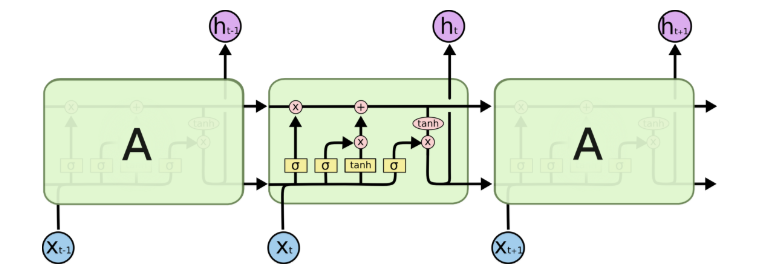<br><center>Рисунок 1: Схема LSTM слоя</center>

Как вам известно при работе с изображениями лучше всего подходит архитектура CNN (сверточная нейронная сеть). Типичная архитектура выглядит следующим образом: Изображение проходит через сверточные слои, в которых несколько фильтров выделяют важные элементы. После последовательного прохождения нескольких сверточных слоев выход подключается к полносвязному слою (Dense)

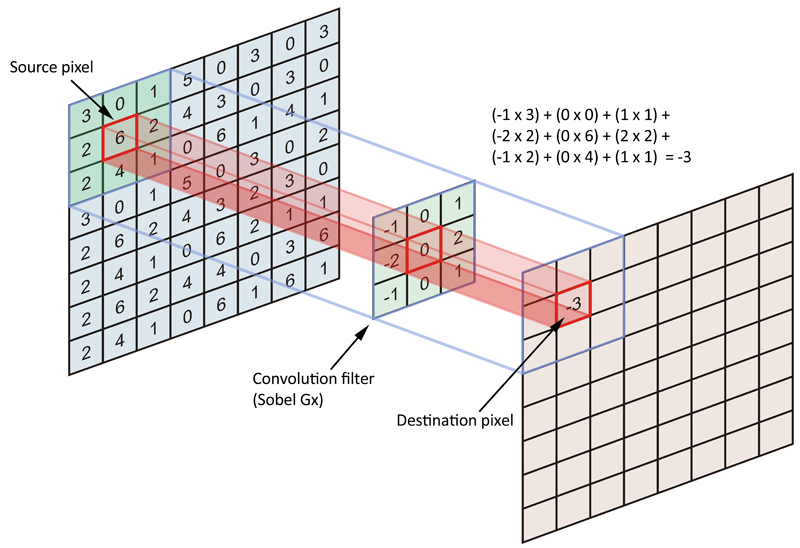<br><center>Рисунок 2: Свертка изображения с использованием одного фильтра</center>

В нашем случае последовательность изображений мы подаем на слои ConvLSTM. Это рекуррентный слой, как и LSTM, но внутренние умножения матриц заменяются операциями свертки. В результате данные, которые проходят через ячейки ConvLSTM, сохраняют входное измерение (в нашем случае 3D), а не просто 1D-вектор с функциями.

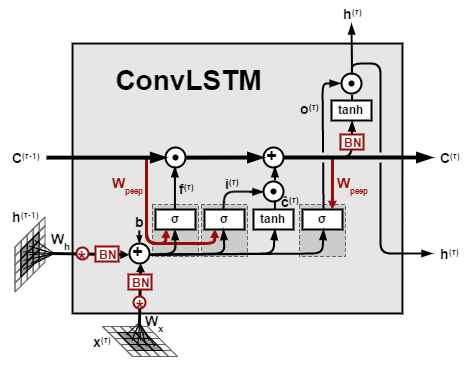<br><center>Рисунок 3: Ячейка ConvLSTM</center>

В качестве альтернативы, вместо <b>ConvLSTM</b> слоя, можно создать модель, состоящую из свёрточных слоев и слоев LSTM, в ней изображения будут проходить через слои свертки, далее через слой flatten преобразовываться в одномерный массив, содержащий полученные параметры (изображения). Повторяя этот процесс для каждого изображения в заданной временной последовательности (например отрывок видео) в результате мы будем иметь набор характеристик для каждого кадра, которые будут являться входными данными для LSTM слоя. Но у нас урок про  <b>ConvLSTM</b> слой, поэтому мы так делать не будем. 

<h2> </b>Параметры ConvLSTM слоя </b></h2>

<b>Вход в ConvLSTM слой</b>
<p>Входные данные для LSTM слоя это набор данных с течением времени (временной ряд), то есть 3D тензор имеющий формат (сэмплы, временной шаг, параметры). Для Свёрточного слоя, входные данные представляют собой набор изображений в виде 4D тензора формата (сэмплы, каналы, строки, столбцы). Входные данные <b>ConvLSTM</b> слоя представляют собой набор изображений с течением времени (кадров) в виде 5D-тензора формата (сэмплы, временные шаги, каналы, строки, столбцы).</p>
<p><b>Выход LSTM слоя</b>
<p>Выход слоя LSTM зависит от атрибута return_sequences. Если установлено True, выход представляет собой временную последовательность (один выход для каждого входа). В этом случае на выходе получается трехмерный тензор вида (сэмплы, временные шаги, параметры (features)). Когда return_sequences имеет значение False (по умолчанию), на выходе будет последнее значение последовательности, то есть 2D-тензор вида (сэмплы, параметры).<br>
Свёрточный слой имеет набор изображений в виде 4D тензора формы (сэмплы, фильтры, строки, столбцы)<br>
<i><b>Выход ConvLSTM слоя</i></b>, - это комбинация свёрточного и LSTM выходов. Как и LSTM, если параметр return_sequences = True, он возвращает последовательность в виде 5D-тензора вида (сэмплы, временный шаги, фильтры, строки, столбцы). С другой стороны, если return_sequences = False, он возвращает только последнее значение последовательности в виде 4D-тензора вида (сэмплы, фильтры, строки, столбцы).
<p>
<b>Другие параметры ConvLSTM слоя</b>
<br>Другие параметры ConvLSTM слоя это производные от Свёрточного и LSTM слоев<br>
От Свёрточного слоя наиболее важные:
<li><b>filters:</b> количество выходных фильтров свертки
<li><b>kernel_size:</b> ширина и высота ядра свертки (окна свертки)
<li><b>padding:</b> отступ один из вариантов "valid" или "same".
<li><b>data_format:</b> формат изображения, если каналы первые ("channels_first") и наоборот  ("channels_last").
<li><b>activation:</b> активационная функция. По умолчанию линейная ф-я активации linear a(x) = x.
<p>От LSTM слоя наиболее важные:
<li><b>recurrent_activation:</b> Активационная функция для каждого шага. По умолчанию hard sigmoid (hard_sigmoid).
<li><b>return_sequences:</b> Возвращает только последнее значение выходной последовательности (False), или всю последовательность (True). По умолчанию False.


<h1><b> Классификация видео-ряда </b></h1>
<p>Ну чтоже, не будем долго вдаваться в теорию, давайте попробуем ConvLSTM слой на практике
<p>

Цель первого примера состоит в том, чтобы определить, что происходит на видео по его отрывку. Обучение может занять очень много времени, чтобы упростить задачу ограничим количество разных вариантов до 6, - скачки, верховая езда, фихтование, езда на велосипеде, гребля, бокс, всего 6 категорий. 
<p>Модель будет принимать видеофрагменты в формате <b><i>(samples, frames, channels, rows, cols)</i></b> Ограничим количество кадров на фрагмент 70 шт и каждый кадр будет иметь формат 3 канала 64х64 пикселей картинка, в итоге <b><i>на входе будем иметь такой формат (samples, 70, 3, 64, 64)</i></b>. Где <b>Samples</b> – это количество доступных трейлеров (фрагментов видео) для обучения.<p>


# Загрузка библиотек

In [ ]:
import cv2 #загружаем библиотеку open cv для работы с видео и изображениями
import os # Загружаем бибилотеку для работы с файлами
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint # импортируем коллбэки
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import * # Загружаем все слои Keras 
import numpy as np
from tensorflow.keras.utils import plot_model # функция для отрисовки структуры модели
from tensorflow.keras.optimizers import Adam, SGD # Импортируем оптимизатор
from sklearn.model_selection import train_test_split # метод разбиентия данных по выборкам обучающая/тестовая
from sklearn.metrics import f1_score, classification_report # метод в библиотеке sklearn для оценки точности модели
import glob # Модуль для нахождения путей файлов
# Загрузка датасетов из облака google
import gdown

# Работа с данными
<p>Мы будем использовать набор данных UCF101, в котором есть короткие видео клипы с различными действиями, такими как макияж, ползание ребенка, марш ансамбля, стрельба из лука и т. Д. В нем всего 13320 видео из 101 категории действий.
<p>UCF101 - это довольно большой набор данных размером около 6,5 ГБ, который можно  <a href='https://www.crcv.ucf.edu/data/UCF101.php', target=blank>скачать UCF101 по этой ссылке</a>. 
<p>У него есть меньшая версия, которая называется UCF50, в которой всего 50 классов. <a href='https://www.crcv.ucf.edu/data/UCF50.php', target=blank>Cкачать UCF50 по этой ссылке</a>.



Для демонстрации мы вопсользуемся датасетом из 6 классов:

In [ ]:
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/extended/gan/l4/UCF6.zip', None, quiet=True)

'UCF6.zip'

In [ ]:
# Директория с датасетом
DATA_DIR = 'UCF6'

Распакуем архив:

In [ ]:
!unzip -q UCF6.zip -d {DATA_DIR}

In [ ]:
channels = 3
img_height, img_width = 64, 64 #зададим ширину и высоту кадра
seq_len = 70 # длина последовательности (колиество кадров)
classes_dict = {'Biking':'Езда на велосипеде', 'Fencing':'Фехтование', 'HorseRace':'Скачки', 'HorseRiding':'Езда на лошади', 'Punch':'Бокс', 'Rowing':'Гребля'}
classes_list = os.listdir(DATA_DIR)
print(f'Классы: {classes_list}')

Классы: ['Biking', 'Fencing', 'HorseRiding', 'HorseRace', 'Rowing', 'Punch']


В коде выше мы задали высоту и ширину кадра 64х64, в принципе  это произвольный параметр ограниченный лишь максимальным размером входных данных и мощностью вашего компьютера. Так же имеет смысл опираться на целесообразность загрузки ресуросв машины. Если задача выполняется с таким размером кадра, нет смысла делать его больше.
<p> Длину последовательности - seq_len зададим в 70 кадров. Тут действует тот же принцип, что и при выборе размера кадра. Еслы вы уверены, что то, что вам надо детектировать попадет в этот диапазон и нейросеть сможет распознать цель, оставляйте 70 кадров. Для улучшения точности можно увеличить этот параметр, но чем их больше, тем дороже вам будет это стоить.
<p>Последними мы задаем названия классов, которые выбрали для тренировки

Теперь нам необходимо извлечь кадры из видеоклипа, для этого напишем несложную функцию:

In [ ]:
# Функция для извлечения кадров из видео
def frame_extractor(video_path):
  frame_list=[]
  videoObj = cv2.VideoCapture(video_path) # Загружаем видеоклип
  count = 1

  while count <= seq_len: # Проходим по видеоклипу и берем 70 кадров

    success, image = videoObj.read() # берем кадр из видео, и получаем признак успешно или нет
    if success:
      image = cv2.resize(image, (img_height, img_width)) # меняем размер кдра до заданного изображения
      frame_list.append(image) # Добавляем кадр в список
      count +=1
    else:
      print('Дефектный кадр')
      break
  return frame_list # возвращаем список


Функция выше получает на вход путь к видеофайлу и извлекает из него заданное количество кадров. 
<p> В строке 4 загружаем видео как объект. Теперь мы моежм использовать его для чтения кадров. Так же мы используем счетчик (строка 5) он будет увеличиваться до seq_len (заданного количества кадров) Переменная count гарантирует, что количество извлеченных кадров будет равно seq_len. 
<p> Если кадр (изображение) захвачено правильно, сначала мы изменяем его размер на заданный,а затем сохраняем его в список.

<p> Если обнаружен дефектный кадр, код выдает об этом сообщение и прекращает извлечение кадров, разрывая цикл. Если количество кадров будет меньше seq_len, то это видео будет отклонено в следущем блоке кода.

In [ ]:
os.listdir(os.path.join(DATA_DIR, classes_list[0]))

['v_Biking_g17_c05.avi',
 'v_Biking_g20_c01.avi',
 'v_Biking_g14_c03.avi',
 'v_Biking_g11_c05.avi',
 'v_Biking_g14_c02.avi',
 'v_Biking_g19_c01.avi',
 'v_Biking_g21_c01.avi',
 'v_Biking_g23_c02.avi',
 'v_Biking_g18_c02.avi',
 'v_Biking_g03_c02.avi',
 'v_Biking_g16_c01.avi',
 'v_Biking_g18_c03.avi',
 'v_Biking_g11_c02.avi',
 'v_Biking_g05_c02.avi',
 'v_Biking_g24_c01.avi',
 'v_Biking_g24_c07.avi',
 'v_Biking_g22_c05.avi',
 'v_Biking_g22_c04.avi',
 'v_Biking_g16_c04.avi',
 'v_Biking_g25_c03.avi',
 'v_Biking_g05_c01.avi',
 'v_Biking_g15_c05.avi',
 'v_Biking_g23_c01.avi',
 'v_Biking_g19_c04.avi',
 'v_Biking_g02_c05.avi',
 'v_Biking_g10_c01.avi',
 'v_Biking_g07_c05.avi',
 'v_Biking_g17_c06.avi',
 'v_Biking_g22_c02.avi',
 'v_Biking_g16_c05.avi',
 'v_Biking_g08_c02.avi',
 'v_Biking_g20_c02.avi',
 'v_Biking_g16_c02.avi',
 'v_Biking_g20_c04.avi',
 'v_Biking_g04_c02.avi',
 'v_Biking_g08_c04.avi',
 'v_Biking_g05_c03.avi',
 'v_Biking_g20_c03.avi',
 'v_Biking_g17_c03.avi',
 'v_Biking_g05_c04.avi',


In [ ]:
# Функция по созданию и разметке данных
def create_data(input_dir):
  data_frames = [] # список для кадров
  labels = [] # список для меток

  classes_list = os.listdir(input_dir) # получаем список папок из общей папки с даными, подразумеваем, что каждая папка соответствует классу

  for curr_class in classes_list: # Проходим по всем папкам/классам
    print(classes_dict[curr_class]) # Выводим название теущего класса
    file_list = os.listdir(os.path.join(input_dir, curr_class)) # Получаем список файлов с путями из текущей папки
    n=0
    for f in file_list: # проходим по всем файлам
      #==== Блок прогресса ==== # Чтобы не сидеть в ожидании неизвестно чего, будем выдодить прогресс в процентах
      n+=1
      print(f"\r{round((n/len(file_list))*100, 2)}%...", end="", flush=True)
      #========================
      frames = frame_extractor(os.path.join(os.path.join(input_dir, curr_class), f)) # берем каждый файл в папке и извлекаем из него кадры
      if len(frames)==seq_len: # если количество кадров соответствуект заданному, добавляем их в массив
        data_frames.append(frames)
        mark = [0]*len(classes_list) # Создаем вектор типа OneHotEncoding
        mark[classes_list.index(curr_class)] = 1 # Ставим 1 на место имени класса, тем самым кодируем класс
        labels.append(mark)
  data_frames = np.asarray(data_frames)
  labels = np.array(labels)
  return data_frames, labels


Перед созданием данных, давайте вспомним входные параметры модели. На вход слой ConvLSTM2D принимает 5D тензор и в зависимости от аргумента у нас есть два варианта позиции каналов.
<li> Если data_format=’channels_first’ 5D тензор имеет формат: (samples, time, channels, rows, cols)
<li> Если data_format=’channels_last’ 5D тензор имеет формат: (samples, time, rows, cols, channels)
<p> В нашем случае из каждого видеоклипа мы будем брать один семпл, который будет состоять из последовательности в 70 изображений (равной seq_len) и каждое изображение будет имет размер 64х64 (img_height, img_width) пикселя и 3 канала (RGB). (1, 70, 64, 64, 3) Вы можете создать более одного семпла на клип, предположим если видео содержит набор различных классов и надо обнаружить их все.

In [ ]:
#загружаем данные
x_data, y_data = create_data(DATA_DIR)

Езда на велосипеде
100.0%...Фехтование
100.0%...Езда на лошади
75.61%...Дефектный кадр
100.0%...Скачки
100.0%...Гребля
100.0%...Бокс
35.0%...Дефектный кадр
51.25%...Дефектный кадр
55.0%...Дефектный кадр
60.62%...Дефектный кадр
100.0%...

Сохраним подготовленный датасет, чтобы не проделывать повторно довольно длительную процедуру преобразования.

In [ ]:
np.save('/content/x_data_video',x_data)
np.save('/content/y_data_video',y_data)

Загрузим данные


In [ ]:
x_data = np.load('/content/x_data_video.npy')
y_data = np.load('/content/y_data_video.npy')

In [ ]:
print(x_data.shape)
print(y_data.shape)

(825, 70, 64, 64, 3)
(825, 6)


разделим данные на обучающую и тестовую выборки

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, shuffle=True, random_state=0)

# Простая нейросеть с ConvLSTM2D слоем
<p> Для начала создадим самую простую архитектуру нейросети с использованием нового слоя ConvLSTM2D.
<p> На вход слоя ConvLSTM2D мы подаем данные в формает (batch_size,70,64,64,3).
Один из важных параметров return_sequences, который вы могли видеть на обучном LSTM слое, устанавливаем <b>return_sequences=False</b>, потому что нам надо, чтобы слой выдавал результат после последнего кадра (семпла), а не после каждого.
<p>Все остальное в модели, думаю будет вам хорошо знакомо. Слой Dropout, Flatten, выходной слой будет иметь 6 нейронов по числу категорий и активацию <b>Softmax</b> Это довольно стандартно для классифицирующих нейросетей.
<p>В качестве функции ошибки применяем categorical_crossentropy, опять же ничего необычного. Применяем оптимизатор Adam со стандартной скоростью обучения и метрику accuracy.
<p>Чтоже, посмотрим на код нейросети ниже

In [ ]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), return_sequences=False, data_format = "channels_last", input_shape = (seq_len, img_height, img_width, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 62, 62, 64)        154624    
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               62980352  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 63,136,518
Trainable params: 63,136,518
No

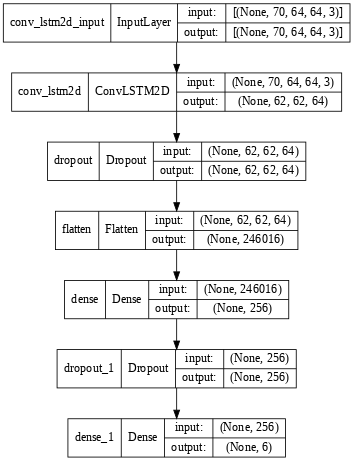

In [ ]:
plot_model(model, dpi=60, show_shapes=True)

## Колбэки

Для предотвращения переобучения мы будем использовать callback - <b>EarlyStoppyng</b>, а так же <b>ModelCheckpoint</b> - для сохранения лучших весов модели и <b>ReduceLROnPlateau</b> - для уменьшения скорости обучения при выходе оптимизатора в режим плато.
<p>Пробежимся чуть подробнее по настройке каждого колбэка: 

In [ ]:
earlystop = EarlyStopping(monitor='loss', mode='auto', min_delta=0, patience=6,verbose=1,baseline=0, restore_best_weights=True)

В <b>EarlyStopping</b> нас интересуюет следующие параметры: <li>monitor='categorical_crossentropy' - параметр отвечает за то, какую метрику будет отслеживать EarlyStopping
<li>mode='min' - параметр отвечает, как мы отслеживаем изменение значений отслеживаемого параметра (ОП). Если max - должен расти, min - должен уменьшаться, auto - определяет автоматически
<li>min_delta=0 - минимальная дельта между теущим и предыдущим значениями ОП
<li>patience=6 - терпение, сколько эпох будем терпеть, если ОП не меняется в лучшую сторону или даже ухудшается, до момента остановки
<li>verbose=1 - выводить служебные сообщения или работать тихо
<li>baseline=0.3 - значение ОП после которого EarlyStopping будет срабатывать. Имеет смысл менять, если вы уже ранее запускали модель на обучения и у вас есть предыдущее значение ОП, чтобы не ухудшить результаты ставим его сюда.
<li>restore_best_weights=True - сохранить лучшие веса. Этот параметр позволяет вернуться к наилучшему достигнутому состоянию модели.

In [ ]:
model_Checkpoint = ModelCheckpoint(filepath='/content/model_video_cat.h5', monitor='loss', verbose=1, save_best_only=True,
                               mode='min', baseline=0)

В <b>ModelCheckpoint</b> праметры схожи с предыдущим разобранным колбэком, за исключением filepath - тут мы задаем путь куда будем сохранять нашу модель

In [ ]:
reduceLROnPlateau = ReduceLROnPlateau(monitor='loss', factor=0.7, patience=3, verbose=1)

<b>ReduceLROnPlateau</b> отвечает за уменьшение скорости обучения, если оптимизатор вышел на плато. Имеет следующие параметры:
<li>monitor='categorical_crossentropy' - отслеживаемый параметр
<li>factor=0.7 - множитель (на сколько уменьшаем скорость обучения)
<li>patience=3 - сколько терпим после выхода на плато до применения колбэка
<li>verbose=1 - выводить информацию или нет о срабатывании колбэка


Соберем все колбэки вместе:

In [ ]:
callbacks = [earlystop, model_Checkpoint, reduceLROnPlateau]

Запустим на обучение нашу модель:

In [ ]:
history = model.fit(x = x_train, y = y_train, epochs=40, batch_size = 8 , shuffle=True, validation_split=0.2, callbacks=callbacks)

Epoch 1/40
66/66 [==============================] - ETA: 0s - loss: 10.9705 - accuracy: 0.4015
Epoch 00001: loss improved from inf to 10.97051, saving model to /content/model_video_cat.h5
66/66 [==============================] - 52s 650ms/step - loss: 10.9705 - accuracy: 0.4015 - val_loss: 1.2347 - val_accuracy: 0.5606 - lr: 0.0010
Epoch 2/40
66/66 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.7784
Epoch 00002: loss improved from 10.97051 to 0.68935, saving model to /content/model_video_cat.h5
66/66 [==============================] - 42s 632ms/step - loss: 0.6893 - accuracy: 0.7784 - val_loss: 0.8942 - val_accuracy: 0.7045 - lr: 0.0010
Epoch 3/40
66/66 [==============================] - ETA: 0s - loss: 0.3844 - accuracy: 0.8826
Epoch 00003: loss improved from 0.68935 to 0.38442, saving model to /content/model_video_cat.h5
66/66 [==============================] - 42s 632ms/step - loss: 0.3844 - accuracy: 0.8826 - val_loss: 1.0325 - val_accuracy: 0.6515 - lr: 0.

In [ ]:
model.save('/content/drive/My Drive/model_video_cat.h5')

# Оценка результатов модели
<p> Для оценки точности модели будем использовать <b>classification_report</b> из библиотеки sklearn.metrics. Тут есть только одна трудность, classification_report требует, что бы классы были закодированы в виде меток (классов), наши тестовые классы y_test имеют формат OneHoteEncoding,а в y_pred, как видно ниже, модель записывает вероятность каждого класса. Поэтому вначале надо конвертировать оба массива.<br>

> Обратите внимание! Вы можете оценивать вашу модель любым другим способом, по вашему усмотрению. Тут показан один из возможных вариантов.

In [ ]:
# Предсказываем классы вдиео из тествовой выборки
y_pred = model.predict(x_test)
print(y_pred.shape)
print(y_pred[:5])

(165, 6)
[[1.1354675e-10 2.7317055e-05 6.4705780e-10 2.3798108e-07 1.4008986e-18
  9.9997246e-01]
 [5.0023619e-02 7.3659253e-01 7.1814872e-02 6.1558854e-02 4.2461708e-02
  3.7548449e-02]
 [5.5491913e-02 4.4623546e-02 8.2234138e-01 3.8297690e-02 3.5006180e-02
  4.2393305e-03]
 [2.0472476e-01 4.3441493e-02 1.0870108e-01 3.5164663e-01 1.7473337e-01
  1.1675273e-01]
 [1.8652616e-05 2.2265270e-04 4.4142598e-05 3.4260890e-03 9.9628794e-01
  4.8910960e-07]]


In [ ]:
# Преобразуем метки классов к нормальному виду
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [ ]:
print(y_pred[:5])
print(y_test[:5])

[5 1 2 3 4]
[5 0 0 4 3]


In [ ]:
# Выводим отчет по точности модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        24
           1       0.73      0.80      0.76        20
           2       0.56      0.67      0.61        33
           3       0.74      0.72      0.73        32
           4       0.72      0.57      0.63        23
           5       0.91      0.91      0.91        33

    accuracy                           0.70       165
   macro avg       0.70      0.69      0.69       165
weighted avg       0.71      0.70      0.70       165



<p>Если вас не устраивает точность модели, вы можете поиграть ее гиперпараметрами, или попробовать другую обработку данных перед подачей в модель. Оставить больше разрешение или увеличить количество кадров на семпл.

# Более сложная модель c ConvLSTM2D слоем
<p> Сейчас мы построим модель с оболее сложной архитектурой. В этом примере мы будем использовать return_sequences = True
<p>Архитектура начинается с двух слоев ConvLSTM, за каждым из которых следует BatchNormalization и MaxPooling. Последовательно он разбивается на ветви, по одной для каждой категории. Все ветви одинаковы, они начинаются с одного слоя ConvLSTM, за которым следует MaxPooling. Затем этот выход проходит через слой Flatten и подключается к полносвязному Dense слою. И наконец, последний Dense слой – c одним нейроном. Ниже, после кода модели, на рисунке показана схема модели целиком. 

In [ ]:
channels = 3
img_height, img_width = 120,160 #зададим ширину и высоту кадра
seq_len = 140 # длина последовательности (колиество кадров)

In [ ]:
tensor_shape = (seq_len,img_height, img_width, channels)
# Функция для первого блока
def My_ConvLSTM_Model(tensor_shape):
  
    input  = Input(shape=(tensor_shape) # Определяем вход модели
                    , name='input')
    
    x = ConvLSTM2D(filters=20, kernel_size=(3, 3) # Первый ConvLSTM слой, обратите внимание на data_format='channels_last'
                       , data_format='channels_last'          # ниже идут стандратные слои Keras c которыми вы уже знакомы
                       , recurrent_activation='hard_sigmoid'
                       , activation='tanh'
                       , padding='same', return_sequences=True)(input)
    x = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last')(x)
    
    x = ConvLSTM2D(filters=10, kernel_size=(3, 3)
                        , data_format='channels_last'
                        , padding='same', return_sequences=True)(x)
    second_BatchNormalization = BatchNormalization()(x)
    x = MaxPooling3D(pool_size=(1, 3, 3), padding='same', data_format='channels_last')(x)
    
    x = ConvLSTM2D(filters=5, kernel_size=(3, 3)
                        , data_format='channels_last'
                        , stateful = False
                        , kernel_initializer='random_uniform'
                        , padding='same', return_sequences=True)(x)
    x = MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last')(x)
    x = TimeDistributed(Flatten())(x)
    
    x = TimeDistributed(Dense(512,))(x)
    x = TimeDistributed(Dense(32,))(x)
    
    output = TimeDistributed(Dense(6, activation='softmax'))(x)
    
    model = Model(inputs=input, outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
    
    return model

Так же мы будем использовать другие настройки для обработки видео.Исходный размер кадра 240х320 пикселей, мы в нашем эксперименте попробуем уменьшить его только в 2 раза. И увеличим количество кадров на каждый семпл в 2 раза, seq_len = 140
<p>Как вы узнали ранее, обучая простую модель, ConvLSTM2D довольно ресурсоемкий слой и даже на маленьком разрешнии 64х64 и короткой последовательности в 70 кадров, обучение на каждой эпохе занимало продолжительное время. Поэтому готовить видеоданные надо ориентируясь на конкретные задачи, минимизируя их объем.

In [ ]:
# Создаем модель
model = My_ConvLSTM_Model(tensor_shape)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 140, 120, 160, 3  0         
                             )]                                  
                                                                 
 conv_lstm2d_7 (ConvLSTM2D)  (None, 140, 120, 160, 20  16640     
                             )                                   
                                                                 
 batch_normalization_4 (Batc  (None, 140, 120, 160, 20  80       
 hNormalization)             )                                   
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 140, 60, 80, 20)  0         
 3D)                                                             
                                                                 
 conv_lstm2d_8 (ConvLSTM2D)  (None, 140, 60, 80, 10)   1084

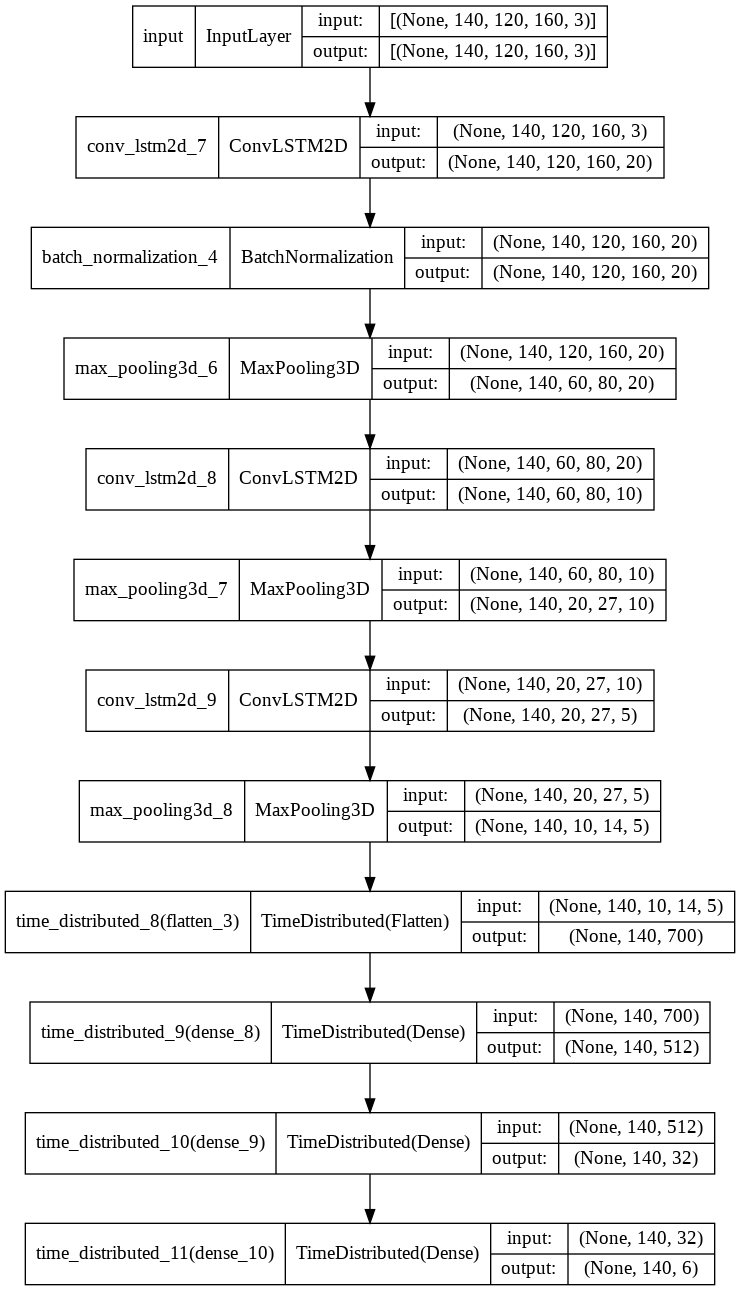

In [ ]:
# Выводим графичиское оторажение модели на экран
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Подготовка данных
<p> Так же в этом прмере мы изменим подход к обработке данных.
<p>На практике загрузка нескольких видеороликов в оперативную память c целью подать на вход модели нецелесообразна. Такая же проблема с памятью довольно часто встречается при работе с большими изображениями. Решением является использование генератора данных, он позволяет нам подавать на вход модели пример за примером с помощью .fit_generator ()а не загружать все данные сразу в оперативную память.
<p>Если вы обратили внимание, то даже в предыдущем примере массив с данными был размером почти 700Мб, хотя мы по минимуму урезали входные данные
<p> В этом примере мы не только увеличим размер кадра, но и в 2 раза количество кадров, извлекаемых из видео. Представьте, что итоговый массив с данными будет иметь размер почти 4Гб 
<p>Поэтому мы будем сохранять каждый семпл как отдельный файл, так же как они идут в папках с видеоклипами

Прежде, чем нарезать видео на кадры и сохранять их в виде numpy массивов, давайте немного разберемся с файлами, папками и прочим. Так как объемы данных предстоят большие, надо понимать, куда мы сохраняем данные, сколько они занимают места и т.д.

In [ ]:
# Функция для подсчета объема занимаемого папкой с файлами
def dir_size(dir_path):
  total_size = 0
  for dirpath, dirnames, filenames in os.walk(dir_path): # проходим всем подкаталогам которые есть по заданному пути
    for f in filenames: # Получаем размер каждого найденного файла
       fp = os.path.join(dirpath, f) # совмещаем имя файла с путем к нему
       total_size += os.path.getsize(fp) # получаем размер файла и плюсуем его к общему размеру папки
  if total_size / 1024 >= 1 and total_size / 1048576 <1: # Перевод в Килобайты
    print ('Объем всех файлов в заданной папке',round(total_size / 1024,3),'Кб')
  elif total_size / 1048576 >= 1 and total_size / 1073741824 <1: # Перевод в Мегабайты
    print ('Объем всех файлов в заданной папке',round(total_size / 1048576,3),'Мб')
  else: # Перевод в Гигабайты
    print ('Объем всех файлов в заданной папке',round(total_size / 1073741824,3),'Гб')

In [ ]:
RESULT_DIR = 'UCF_numpy'

In [ ]:
!rm -rf {RESULT_DIR}
!mkdir {RESULT_DIR}

Функция по извлечению кадров из видео останется такой же как и представленная выше в первом примере

In [ ]:
# Функция для извлечения кадров из видео
def frame_extractor(video_path):
  frame_list=[]
  videoObj = cv2.VideoCapture(video_path) # Загружаем видеоклип
  count = 1

  while count <= seq_len: # Проходим по видеоклипу и берем 140 кадров

    success, image = videoObj.read() # берем кадр из видео, и получаем признак успешно или нет
    if success:
      image = cv2.resize(image, (img_width, img_height)) # меняем размер кдра до заданного изображения
      frame_list.append(image) # Добавляем кадр в список
      count +=1
    else:
      #print('Дефектный кадр')
      break
  return frame_list # возвращаем список


А вот функция по созданию и разметке данных у нас довольно сильно изменится. 

In [ ]:
# Функция по созданию и разметке данных
def create_data(source_dir, result_dir):  
  ''' Аргументы: 
              source_dir - папка где хранятся данные
              result_dir - папка, куда сохранять обработанные файлы
  '''
  classes_list = os.listdir(source_dir) # получаем список папок из общей папки с даными, подразумеваем, что каждая папка соответствует классу

  for curr_class in classes_list: # Проходим по всем папкам/классам
    print(classes_dict[curr_class]) # Выводим название теущего класса
    file_list = os.listdir(os.path.join(source_dir, curr_class)) # Получаем список файлов с путями из текущей папки
    class_len = len(file_list)
    n=0
    class_file_count=0 # подссчет файлов из которых удалось извлечь кадры
    for file_name in file_list: # проходим по всем файлам
      #data_frames = [] # список для кадров
      #labels = [] # список для меток
      #==== Блок прогресса ==== # Чтобы не сидеть в ожидании неизвестно чего, будем выдодить прогресс в процентах
      n+=1
      print(f"\r{round((n/class_len)*100, 2)}%...", end="", flush=True)
      #========================
      frames = frame_extractor(os.path.join(os.path.join(source_dir, curr_class), file_name)) # берем каждый файл в папке и извлекаем из него кадры
      if len(frames)==seq_len: # если количество кадров соответствуект заданному, добавляем их в массив
        class_file_count+=1
        frames = np.array(frames) # Если frames содержат кадры из файла переводим его в массив
        mark = [0]*len(classes_list) # Создаем вектор типа OneHotEncoding
        mark[classes_list.index(curr_class)] = 1 # Ставим 1 на место имени класса, тем самым кодируем класс
        labels = np.zeros((1,seq_len,len(classes_list))) # создаем шаблон под разметку датафрейма
        for i in range (seq_len): # Проходим по всем кадрам в датафрейме
          labels[0][i] = mark # присваиваем им текущий класс

        np.save(os.path.join(result_dir,file_name.split('.')[0]),frames) # сохраняем numpy массив с кадрами под именем файла донора 
        np.save(os.path.join(result_dir,file_name.split('.')[0]+'_mark'),labels)
    print('Всего в классе', class_len,'файлов.', end = '')
    print('Удалось извлечь кадры из ', class_file_count, round(class_file_count/class_len*100,2),'%')

In [ ]:
# Преобразуем видеоданные в набор Numpy массивов
create_data(DATA_DIR, RESULT_DIR)

Езда на велосипеде
100.0%...Всего в классе 134 файлов.Удалось извлечь кадры из  128 95.52 %
Фехтование
100.0%...Всего в классе 111 файлов.Удалось извлечь кадры из  24 21.62 %
Езда на лошади
100.0%...Всего в классе 164 файлов.Удалось извлечь кадры из  151 92.07 %
Скачки
100.0%...Всего в классе 124 файлов.Удалось извлечь кадры из  117 94.35 %
Гребля
100.0%...Всего в классе 137 файлов.Удалось извлечь кадры из  128 93.43 %
Бокс
100.0%...Всего в классе 160 файлов.Удалось извлечь кадры из  146 91.25 %


In [ ]:
dir_size(RESULT_DIR)

Объем всех файлов в заданной папке 5.217 Гб


Мы подготовили данные для нейросети, давайте посмотрим, как выглядит какой-нибудь семпл и парный ему лейбл. Что бы сразу получить список нужных файлов с путями к ним, воспользуемся удоной библиотекой <b>globe</b>:

In [ ]:
# Функция для получения списка файлов в папке с путями к ним
def get_file_paths(train_folder_with_tamplate):
    return glob.glob(train_folder_with_tamplate,recursive=True) # возвращем список файлов с путями

# Получаем список путей ко всем файлам с их именами
file_list = get_file_paths(RESULT_DIR+'/**'+ '*_mark.npy')
print(len(file_list))

694


>Обратите внимание! Выше мы отбираем все файлы с префиксом _mark - это метки класса, каждый из них имеет пару без префикса,- это наши данные (кадры в формате numpy массив). <br>
Когда мы загружаем список файлов, имя имеет вид:<br> 


In [ ]:
file_list[0]

'UCF_numpy/v_HorseRiding_g17_c05_mark.npy'

> Чтобы получить имя его пары мы отбрасываем расширение файла и отрезаем префикс _mark (5 символов с конца), а затем добавляем расшрирение обратно. В итоге получаем имя парного файла.

In [ ]:
file_list[0].split('.')[0][:-5]+'.npy'

'UCF_numpy/v_HorseRiding_g17_c05.npy'

Как видно из кода ниже, каждая пара семплов сосотоит из набора кадров, заданного размера и набора лэйблов для каждлого кадра. Все как мы хотели.

In [ ]:
x_sample = np.load(file_list[0].split('.')[0][:-5]+'.npy')
print(x_sample.shape)
y_sample = np.load(file_list[0])
print(y_sample.shape)

(140, 120, 160, 3)
(1, 140, 6)


После того, как мы получили список всех файлов с путями разделим их на обучающую и проверочные выборки

In [ ]:
from random import shuffle
shuffle(file_list)

# Разделяем выборку на обучающую и проверочную
final_train_id = int(len(file_list)*0.8)
train_list = file_list[:final_train_id]
val_list = file_list[final_train_id:]

print(len(file_list))
print(len(train_list))
print(len(val_list))

694
555
139


## Генератор данных

Теперь, когда данные готовы, напишем функцию генератора. На вход,  генератор будет принимать список файлов с путями, а на выходе будет формировать пакеты с загруженными файлами, заданного размера

In [ ]:
file_list[0].split('.')[0][:-5]+'.npy'

'UCF_numpy/v_HorseRace_g21_c01.npy'

In [ ]:
batch_size = 2

def create_data_generator(file_list, batch_size):
  from random import shuffle
  shuffle(file_list) # перемешиваем список с именами файлов
  while True:
    for i in range (0,len(file_list),batch_size):
      videos = []
      labels = []
      curr_list = file_list[i:i+batch_size] #берем текущий список файлов длиной batch_size
      for file in curr_list:
        x_sample = np.load(file.split('.')[0][:-5]+'.npy') # подрезаем имя файла
        y_sample = np.load(file)
        videos.append(x_sample)
        labels.extend(y_sample)

      yield (np.array(videos),np.array(labels) )

In [ ]:
# Создаем генератор
data_train_generator = create_data_generator(train_list,batch_size)
data_val_generator = create_data_generator(val_list,batch_size)

Генератор готов, протестируем его, чтобы убедится, что все работает правильно:

In [ ]:
test = [x for _, x in zip(range(5), data_train_generator)] # делаем 5 шагов, смотрим какие данные выдает генератор

In [ ]:
for i in range(5):
  print(test[i][0].shape)
  print(test[i][1].shape)

(2, 140, 120, 160, 3)
(2, 140, 6)
(2, 140, 120, 160, 3)
(2, 140, 6)
(2, 140, 120, 160, 3)
(2, 140, 6)
(2, 140, 120, 160, 3)
(2, 140, 6)
(2, 140, 120, 160, 3)
(2, 140, 6)


Выше видно, что генератор работает правильно, выдает пакеты заданного размера. Моджно приступать к обучению нейросети. При обучении будем использовать те же, колбэки, что и ранее:

In [ ]:
earlystop = EarlyStopping(monitor='loss', mode='auto', min_delta=0, patience=6,verbose=1,baseline=0, restore_best_weights=True)
model_Checkpoint = ModelCheckpoint(filepath='/content/model2_video_cat.h5', monitor='loss', verbose=1, save_best_only=True,
                               mode='min', baseline=0)
reduceLROnPlateau = ReduceLROnPlateau(monitor='loss', factor=0.7, patience=3, verbose=1)

# Обучение
<p>

In [ ]:
# Создаем модель
model = My_ConvLSTM_Model(tensor_shape)

In [ ]:
# Обучаем vjltkm
history = model.fit(
    data_train_generator
    , steps_per_epoch = len(train_list)//batch_size
    , validation_data = data_val_generator
    , validation_steps = len(val_list)//batch_size
    , callbacks =[reduceLROnPlateau,earlystop, model_Checkpoint]
    , epochs = 10
    , verbose = 1
    , shuffle = False
    , initial_epoch = 0
    )

Epoch 1/10
277/277 [==============================] - ETA: 0s - loss: 1.3560 - accuracy: 0.4900
Epoch 00001: loss improved from inf to 1.35600, saving model to /content/model2_video_cat.h5
277/277 [==============================] - 740s 3s/step - loss: 1.3560 - accuracy: 0.4900 - val_loss: 2.0116 - val_accuracy: 0.2304 - lr: 0.0010
Epoch 2/10
277/277 [==============================] - ETA: 0s - loss: 1.0012 - accuracy: 0.6163
Epoch 00002: loss improved from 1.35600 to 1.00116, saving model to /content/model2_video_cat.h5
277/277 [==============================] - 728s 3s/step - loss: 1.0012 - accuracy: 0.6163 - val_loss: 1.7602 - val_accuracy: 0.3872 - lr: 0.0010
Epoch 3/10
277/277 [==============================] - ETA: 0s - loss: 0.9320 - accuracy: 0.6588
Epoch 00003: loss improved from 1.00116 to 0.93199, saving model to /content/model2_video_cat.h5
277/277 [==============================] - 727s 3s/step - loss: 0.9320 - accuracy: 0.6588 - val_loss: 1.1067 - val_accuracy: 0.6114 - l

## Оценка точности

In [ ]:
shuffle(file_list)

In [ ]:
idx = np.random.randint(0, len(file_list))
x_sample = np.load(file_list[idx].split('.')[0][:-5]+'.npy')
print(x_sample.shape)
y_sample = np.load(file_list[idx])
print(y_sample.shape)

(140, 120, 160, 3)
(1, 140, 6)


In [ ]:
x_sample = np.expand_dims(x_sample, 0)
print(x_sample.shape)
pred = model.predict([x_sample])

(1, 140, 120, 160, 3)


In [ ]:
pr = np.argmax(np.mean(pred[0],0))
print("Предсказание:", classes_dict[classes_list[pr]])
print("Истина:",classes_dict[classes_list[np.argmax(y_sample[0][0])]] )


Предсказание: Гребля
Истина: Гребля


# Анализ видеопотока

Теперь попробуем усложнить задачу для нейросети. Наша нейросеть обучена анализировать пакет из 140 кадров. Давайте замешаем в один пакет сразу несколько разных сцен. Исходя из уже заданного размера пакета, 140 кадров, нам удобно разбить его на 4 части по 35 кадров. Ниже выведены на экран имена файлов, которые будем использовать для микса

In [ ]:
# Список сцен из которых будет состоять сэмпл длиной 140 кадров
for i in range(6):
  print(file_list[i].split('.')[0][:-5]+'.npy')

UCF_numpy/v_Punch_g14_c04.npy
UCF_numpy/v_Punch_g12_c03.npy
UCF_numpy/v_HorseRiding_g11_c02.npy
UCF_numpy/v_HorseRiding_g04_c06.npy
UCF_numpy/v_HorseRiding_g19_c03.npy
UCF_numpy/v_Punch_g25_c02.npy


In [ ]:
# Загружаем первую сцену
x_sample = np.load(file_list[0].split('.')[0][:-5]+'.npy')
print(x_sample.shape)
y_sample = np.load(file_list[0])
print(y_sample.shape)

(140, 120, 160, 3)
(1, 140, 6)


Сначала мы загружаем первую сцену длиной 140 кадров. Первые 35 кадров оставим без изменений, далее будем записывать каждые следующие 35 кадров беря данные из новых файлов.

In [ ]:
scena = 1
for i in range(0,len(x_sample[35:]),35):
  xx = np.load(file_list[scena].split('.')[0][:-5]+'.npy')
  yy = np.load(file_list[scena]) 
  print(file_list[scena].split('/')[-1])
  for j in range(35): # проходим по 35 кадрам и записываем вместо них кадры из новой сцены (первыйе 35 кадров оставим без изменения)
    x_sample[i+35+j] = xx[j]
    y_sample[0][i+35+j] = yy[0][j]
  scena+=1 # Меняем сцену
  print(i)

v_Punch_g12_c03_mark.npy
0
v_HorseRiding_g11_c02_mark.npy
35
v_HorseRiding_g04_c06_mark.npy
70


Проверим какие сцены записались в массив

In [ ]:
for i in range(0,140,35):
  print("Истина:",classes_dict[classes_list[np.argmax(y_sample[0][i])]] )

Истина: Бокс
Истина: Бокс
Истина: Езда на лошади
Истина: Езда на лошади


Анализируем наш "видеопоток"

In [ ]:
x_sample = np.expand_dims(x_sample, 0)
print(x_sample.shape)
pred = model.predict([x_sample])

(1, 140, 120, 160, 3)


In [ ]:
# Мы задали, что сцена меняется каждые 35 кадров 
for i in range(0,140,35):
  pr = np.argmax(np.mean(pred[0][i:i+35],0))
  print("Предсказание:", classes_dict[classes_list[pr]])
  print("Истина:",classes_dict[classes_list[np.argmax(y_sample[0][i+5])]] )


Предсказание: Бокс
Истина: Бокс
Предсказание: Бокс
Истина: Бокс
Предсказание: Бокс
Истина: Езда на лошади
Предсказание: Гребля
Истина: Езда на лошади


# Итоги
<p> Подведем итоги первой части урока. В первом примере мы ознакомились со слоем ConvLSTM2D, узнали какие аргументы он принимает и как его использовать с параметром <b>return_sequences=False</b>. Во втором примере мы использовали этот слой с параметром <b>return_sequences=True</b>. В таком режиме использование слоя Conv2D позволяет гибко анализировать весь пакет данных. Мы можем оценить, как один кадр, так и весь пакет целиком, как одну сцену. Покадровая дискретизация видеофрагмента, позволяет нам гибко анализировать участки видео потока.
<p>Оба примера дают общее представление о работе со слоем <b>ConvLSTM2D</b>, подходах к работе с данными и намечают возможные варианты его использования.

<p>Далее мы рассмотрим использование этого слоя для предсказания развития сцены. Т.е. мы будем учиться предсказывать будущий видео кадр.

**Содержание**:

1. Теория
2. [Практический ноутбук](https://colab.research.google.com/drive/1jOTvHATmseBGSABUsji_7o9oz5C19A4V?usp=sharing)